In [135]:
import pandas as pd

In [136]:
df = pd.read_csv('fetal_health.csv')

df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [138]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement ML Algorithms
import sklearn

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to record time
import time

# Module to save and load Python objects to and from files
import pickle 

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

******** Random Forest ********

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
# Select input and output features
X = df.drop(columns = ['fetal_health'])
y = df['fetal_health']

In [141]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 1) 

# Defining prediction model
rf_clf = RandomForestClassifier(random_state = 0)

# Fitting model on training data
rf_clf.fit(train_X, train_y)

RandomForestClassifier(random_state=0)

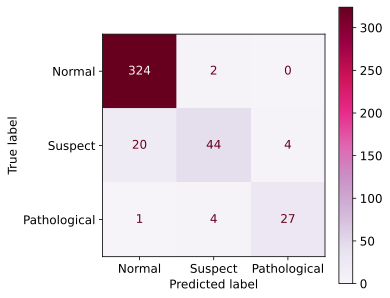

In [142]:
# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# I used ChatGPT to help me figure out how to add my own custom labels


# Predictions on test set
y_pred = rf_clf.predict(test_X)

# Define custom labels for display
custom_labels = ["Normal", "Suspect", "Pathological"]

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = custom_labels)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);

fig.savefig("cmat_rf.svg", bbox_inches = 'tight')

In [143]:
from sklearn.metrics import classification_report

# Generating Classification Report
report = classification_report(test_y, y_pred, target_names=custom_labels, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# Save the report as a CSV File
report_df.to_csv('class_report_rf.csv') 

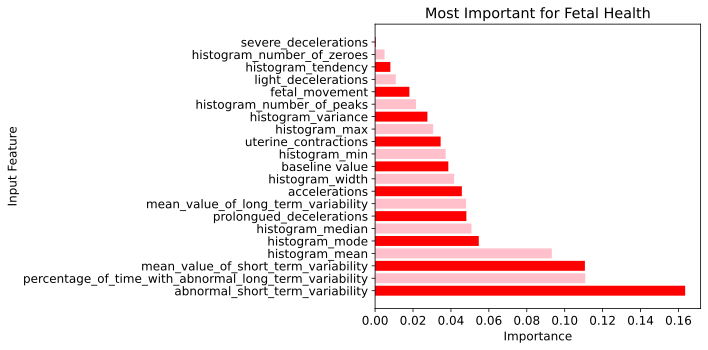

In [144]:
# Storing importance values from the trained model
importance = rf_clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['red', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Most Important for Fetal Health') 
plt.tight_layout()
plt.savefig("feature_imp_rf.svg");

In [145]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
rf_pickle = open('rf_fetal.pickle', 'wb') 

# Write DT model to the file
pickle.dump(rf_clf, rf_pickle) 

# Close the file
rf_pickle.close() 

******** Decision Tree ********

In [146]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
# Defining prediction model
dt_clf = DecisionTreeClassifier(random_state = 0)

# Fitting model on training data
dt_clf.fit(train_X, train_y)

DecisionTreeClassifier(random_state=0)

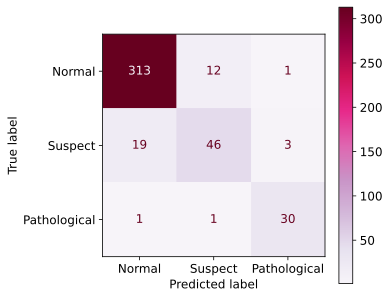

In [148]:
# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# I used ChatGPT to help me figure out how to add my own custom labels


# Predictions on test set
y_pred = dt_clf.predict(test_X)

# Define custom labels for display
custom_labels = ["Normal", "Suspect", "Pathological"]

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = dt_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = custom_labels)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);

fig.savefig("cmat_dt.svg", bbox_inches = 'tight')

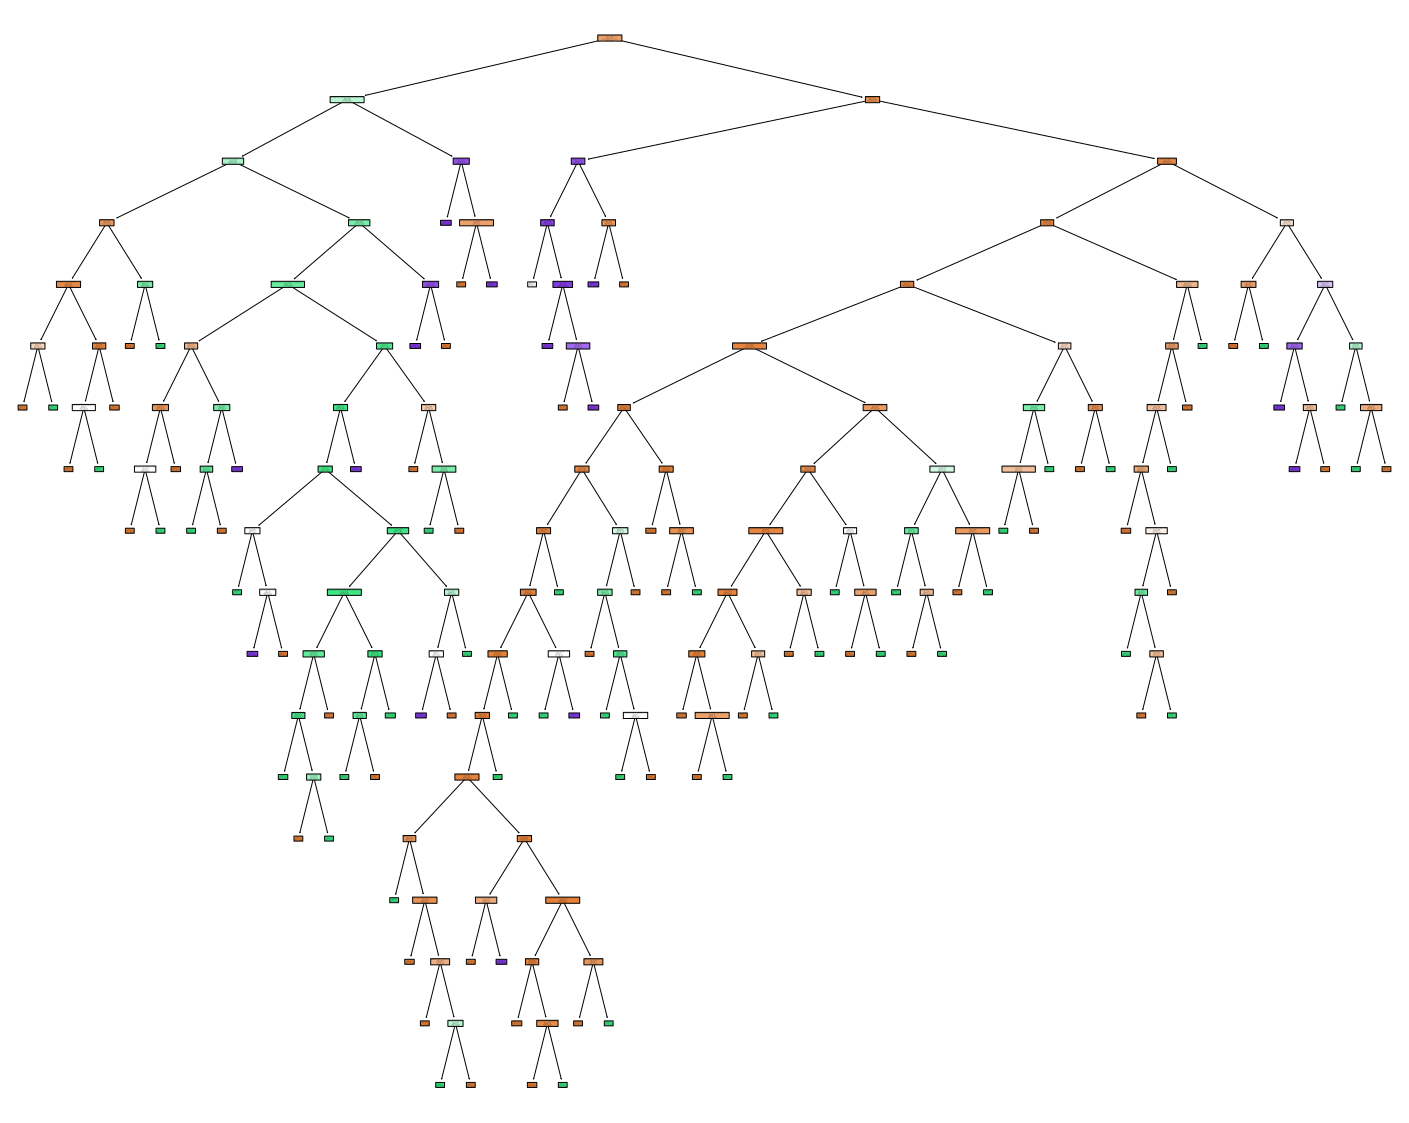

In [149]:
# Package to visualize Decision Tree
from sklearn import tree

# Visualizing trained decision tree model
fig = plt.figure(figsize = (25,20))
a = tree.plot_tree(decision_tree = dt_clf,
                   max_depth = None,
                   feature_names = train_X.columns,
                   class_names = custom_labels,
                   filled = True)

# Saving Decision Tree
fig.savefig("fetal_decision_tree.svg", bbox_inches = 'tight')

In [150]:
from sklearn.metrics import classification_report

# Generating Classification Report
report = classification_report(test_y, y_pred, target_names=custom_labels, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# # Save the report as a CSV File
report_df.to_csv('class_report_dt.csv') 

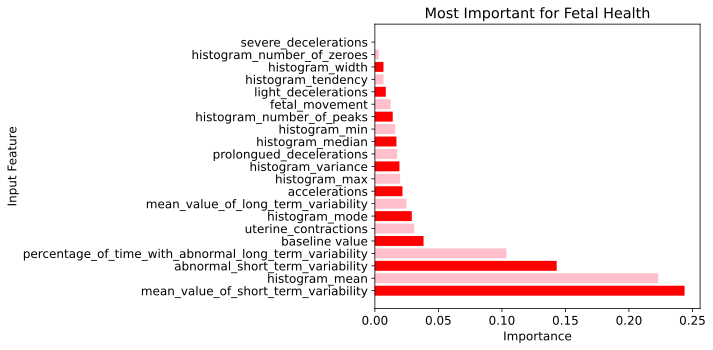

In [151]:
# Storing importance values from the trained model
importance = dt_clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['red', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Most Important for Fetal Health') 
plt.tight_layout()
plt.savefig("feature_imp_dt.svg");

In [152]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
dt_pickle = open('dt_fetal.pickle', 'wb') 

# Write DT model to the file
pickle.dump(dt_clf, dt_pickle) 

# Close the file
dt_pickle.close() 

******** AdaBoost ********

In [153]:
# Package to implement AdaBoost
import sklearn
from sklearn.ensemble import AdaBoostClassifier #AdaboostRegressor

# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from pprint import pprint

In [154]:
# Define your model
classifier = AdaBoostClassifier(algorithm = 'SAMME', random_state = 42)

In [155]:
# Start with an initial guess for parameters
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 500, num = 10)]

learning_rate = [x for x in np.arange(0.1, 2.1, 0.1)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate
}

pprint(random_grid)

{'learning_rate': [0.1,
                   0.2,
                   0.30000000000000004,
                   0.4,
                   0.5,
                   0.6,
                   0.7000000000000001,
                   0.8,
                   0.9,
                   1.0,
                   1.1,
                   1.2000000000000002,
                   1.3000000000000003,
                   1.4000000000000001,
                   1.5000000000000002,
                   1.6,
                   1.7000000000000002,
                   1.8000000000000003,
                   1.9000000000000001,
                   2.0],
 'n_estimators': [5, 60, 115, 170, 225, 280, 335, 390, 445, 500]}


In [156]:
# Creating stratified folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

In [157]:
# Call RandomizedSearchCV()
random_cv = RandomizedSearchCV(estimator = classifier,
                              param_distributions = random_grid,
                              n_iter = 100,
                              scoring = 'f1_macro',
                              cv = folds,
                              verbose = 2,
                              random_state = 42,
                              n_jobs = -1) # Will utilize all available CPUs

In [158]:
# Fit the model
start = time.time()            # Start Time
random_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ................learning_rate=0.2, n_estimators=280; total time=   1.9s
[CV] END ................learning_rate=1.0, n_estimators=280; total time=   1.9s
[CV] END ................learning_rate=0.2, n_estimators=280; total time=   2.0s
[CV] END ................learning_rate=1.0, n_estimators=280; total time=   2.0s
[CV] END ................learning_rate=1.0, n_estimators=280; total time=   2.0s
[CV] END ................learning_rate=1.0, n_estimators=280; total time=   2.0s
[CV] END ................learning_rate=1.0, n_estimators=280; total time=   2.0s
[CV] END ................learning_rate=0.2, n_estimators=280; total time=   2.0s
[CV] END ..................learning_rate=0.4, n_estimators=5; total time=   0.0s
[CV] END ..................learning_rate=0.4, n_estimators=5; total time=   0.0s
[CV] END ..................learning_rate=0.4, n_estimators=5; total time=   0.0s
[CV] END ..................learning_rate=0.4, 

In [159]:
from sklearn.metrics import classification_report

# Generating Classification Report
report = classification_report(test_y, y_pred, target_names=custom_labels, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# # Save the report as a CSV File
report_df.to_csv('class_report_ada.csv') 

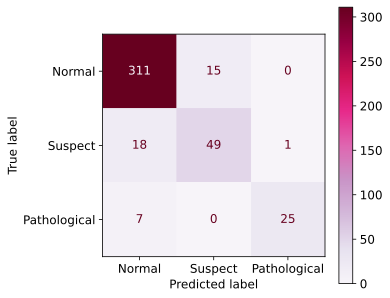

In [160]:
# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# I used ChatGPT to help me figure out how to add my own custom labels


# Predictions on test set
y_pred = random_cv.predict(test_X)

# Define custom labels for display
custom_labels = ["Normal", "Suspect", "Pathological"]

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = random_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = custom_labels)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);

fig.savefig("cmat_ada.svg", bbox_inches = 'tight')

In [161]:
from sklearn.metrics import classification_report

# Generating Classification Report
report = classification_report(test_y, y_pred, target_names=custom_labels, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# # Save the report as a CSV File
report_df.to_csv('class_report_ada.csv') 

In [162]:
# Storing importance values from the best fit model
importance = random_cv.best_estimator_.feature_importances_

In [163]:
# Displaying feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

feature_imp

,Feature,Importance
0,abnormal_short_term_variability,0.183428
1,percentage_of_time_with_abnormal_long_term_var...,0.150680
2,histogram_mode,0.095261
3,histogram_mean,0.087292
4,mean_value_of_short_term_variability,0.060530
5,baseline value,0.051710
6,prolongued_decelerations,0.049576
7,histogram_median,0.047649
8,light_decelerations,0.042199
9,accelerations,0.040696


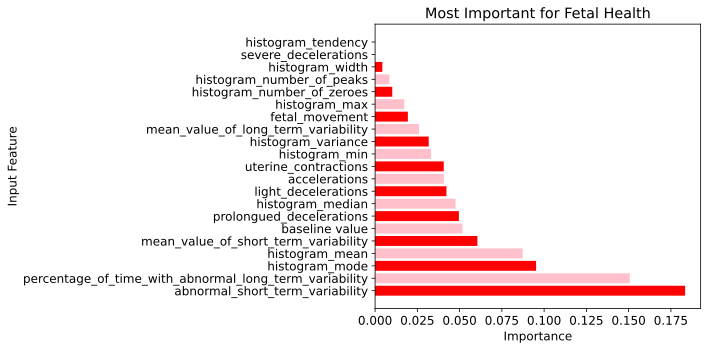

In [164]:
# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['red', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Most Important for Fetal Health') 
plt.tight_layout()
plt.savefig("feature_imp_ada.svg");

In [165]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
ada_pickle = open('ada_fetal.pickle', 'wb') 

# Write DT model to the file
pickle.dump(random_cv, ada_pickle) 

# Close the file
ada_pickle.close() 

******** Soft Voting Classifier ********

In [166]:
from sklearn.ensemble import VotingClassifier

In [167]:
# Models to use for hard voting
# Model 1
dt_clf = DecisionTreeClassifier(random_state = 42)
# Model 2
rf_clf = RandomForestClassifier(random_state = 42)
# Model 3
ada_clf = AdaBoostClassifier(algorithm = 'SAMME', random_state = 42)

In [168]:
from sklearn.metrics import f1_score


# used chat you help set up code

# Train each model on the training data
dt_clf.fit(train_X, train_y)
rf_clf.fit(train_X, train_y)
ada_clf.fit(train_X, train_y)

# Get F1 macro scores for each model on the test data
f1_dt = f1_score(test_y, dt_clf.predict(test_X), average='macro')
f1_rf = f1_score(test_y, rf_clf.predict(test_X), average='macro')
f1_ada = f1_score(test_y, ada_clf.predict(test_X), average='macro')

# Normalize the F1 scores to use them as weights
f1_scores = [f1_dt, f1_rf, f1_ada]
weights = [score / sum(f1_scores) for score in f1_scores]

weights

[0.33958294412409906, 0.3449495267281467, 0.31546752914775417]

In [169]:
# Implement soft voting classifier on train data
soft_voting_clf = VotingClassifier(estimators = [('dt', dt_clf), ('rf', rf_clf), ('ada', ada_clf)],
                              voting = 'soft', weights = weights, n_jobs = -1)
soft_voting_clf.fit(train_X, train_y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('ada',
                              AdaBoostClassifier(algorithm='SAMME',
                                                 random_state=42))],
                 n_jobs=-1, voting='soft',
                 weights=[0.33958294412409906, 0.3449495267281467,
                          0.31546752914775417])

In [170]:
from sklearn.metrics import f1_score

# Evaluate prediction performance on test data using F1 Score
for clf in (dt_clf, rf_clf, ada_clf, soft_voting_clf):
    clf.fit(train_X, train_y)
    y_pred = clf.predict(test_X)
    print(clf.__class__.__name__, f1_score(test_y, y_pred, average = 'macro'))

DecisionTreeClassifier 0.8610949129072107
RandomForestClassifier 0.8747031846417093
AdaBoostClassifier 0.7999444295920409
VotingClassifier 0.8610949129072107


In [171]:
from sklearn.metrics import classification_report

# Generating Classification Report
report = classification_report(test_y, y_pred, target_names=custom_labels, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# # Save the report as a CSV File
report_df.to_csv('class_report_soft.csv') 

In [172]:
# Getting prediction probabilites
prob = soft_voting_clf.predict_proba(test_X)

# Printing prediction results
result = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

# Creating columns for rejection and acceptance prob.
result[['Prob. of Normal','Prob. of Suspect', 'Prob. of Pathological']] = pd.DataFrame(prob.tolist(), index = result.index)

# Saving dataframe as a csv file
result.to_csv('Prediction Results Soft.csv', index = False)

result.sample(10)

,Actual,Predicted,Prob. of Normal,Prob. of Suspect,Prob. of Pathological
1626,1.0,1.0,0.805613,0.105007,0.089380
292,1.0,1.0,0.708858,0.196991,0.094152
1292,1.0,1.0,0.807888,0.105913,0.086199
1904,3.0,3.0,0.210521,0.102758,0.686721
525,1.0,1.0,0.768166,0.140975,0.090860
447,2.0,2.0,0.105125,0.797401,0.097474
1289,1.0,2.0,0.312514,0.510348,0.177138
108,1.0,1.0,0.804645,0.106236,0.089118
165,1.0,1.0,0.800778,0.110583,0.088638
1760,1.0,1.0,0.804490,0.102006,0.093503


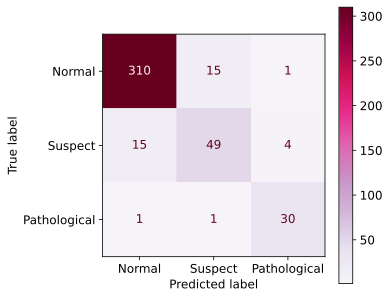

In [173]:
# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# I used ChatGPT to help me figure out how to add my own custom labels


# Predictions on test set
y_pred = soft_voting_clf.predict(test_X)

# Define custom labels for display
custom_labels = ["Normal", "Suspect", "Pathological"]

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = soft_voting_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = custom_labels)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);

fig.savefig("cmat_soft.svg", bbox_inches = 'tight')

In [174]:
importance_rf = rf_clf.feature_importances_
importance_dt = dt_clf.feature_importances_
importance_ada = ada_clf.feature_importances_

feature_imp_rf = pd.DataFrame(list(zip(train_X.columns, importance_rf)),
        columns = ['Feature', 'Random Forest'])

feature_imp_dt = pd.DataFrame(list(zip(train_X.columns, importance_dt)),
        columns = ['Feature', 'Decision Tree'])

feature_imp_ada = pd.DataFrame(list(zip(train_X.columns, importance_ada)),
        columns = ['Feature', 'AdaBoost'])

merged_1 = feature_imp_rf.merge(feature_imp_dt, on='Feature')
merged_final = merged_1.merge(feature_imp_ada, on='Feature')

merged_final





,Feature,Random Forest,Decision Tree,AdaBoost
0,baseline value,0.036909,0.027091,0.048275
1,accelerations,0.043998,0.027094,0.068237
2,fetal_movement,0.016826,0.009506,0.010098
3,uterine_contractions,0.038422,0.036096,0.044274
4,light_decelerations,0.009070,0.008606,0.000000
5,severe_decelerations,0.000057,0.000000,0.000000
6,prolongued_decelerations,0.056616,0.017579,0.063987
7,abnormal_short_term_variability,0.139572,0.133893,0.212495
8,mean_value_of_short_term_variability,0.129624,0.243376,0.114330
9,percentage_of_time_with_abnormal_long_term_var...,0.100078,0.100526,0.148533


In [175]:
merged_final['Weighted'] = merged_final['Random Forest'] * weights[0] + merged_final['Decision Tree'] * weights[1] + merged_final['AdaBoost'] * weights[2]

merged_final.sort_values(by='Weighted', ascending=False, inplace=True)

merged_final

,Feature,Random Forest,Decision Tree,AdaBoost,Weighted
8,mean_value_of_short_term_variability,0.129624,0.243376,0.114330,0.164038
7,abnormal_short_term_variability,0.139572,0.133893,0.212495,0.160618
17,histogram_mean,0.089844,0.232116,0.091291,0.139377
9,percentage_of_time_with_abnormal_long_term_var...,0.100078,0.100526,0.148533,0.115518
16,histogram_mode,0.061770,0.021097,0.103424,0.060880
1,accelerations,0.043998,0.027094,0.068237,0.045814
6,prolongued_decelerations,0.056616,0.017579,0.063987,0.045476
3,uterine_contractions,0.038422,0.036096,0.044274,0.039466
18,histogram_median,0.056819,0.010660,0.049637,0.038631
0,baseline value,0.036909,0.027091,0.048275,0.037108


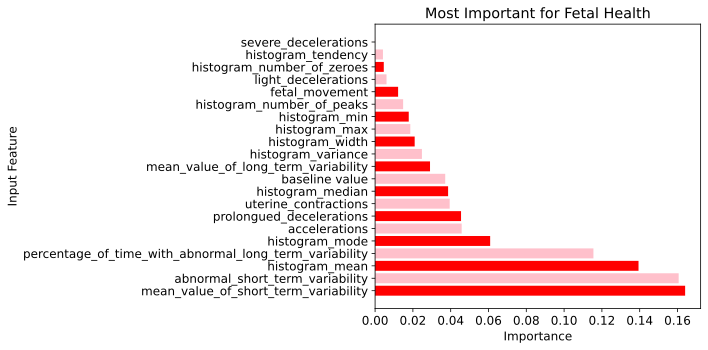

In [176]:
# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(merged_final['Feature'], merged_final['Weighted'], color = ['red', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Most Important for Fetal Health') 
plt.tight_layout()
plt.savefig("feature_imp_soft.svg");

In [177]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
sv_pickle = open('sv_fetal.pickle', 'wb') 

# Write DT model to the file
pickle.dump(soft_voting_clf, sv_pickle) 

# Close the file
sv_pickle.close() 